# Data augmentation
### package: imgaug

In [5]:

import imageio
from imgaug import augmenters as iaa
import cv2
import glob
import numpy as np
import os
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import csv
from numpy import savez_compressed
from numpy import load
from numpy import loadtxt

In [8]:
# # first way, randomly crop the image from (64*64) to (54*54) according to the paper
# def crop(image):
#     image_array = tf.image.convert_image_dtype(image, dtype=tf.float32)
#     image_array = tf.multiply(tf.subtract(image_array, 0.5), 2)
#     image_array = tf.reshape(image, [64, 64, 3])
#     image_cropped = tf.random_crop(image, [54, 54, 3])
#     return image_cropped

In [21]:
# data augmentation process
'''
pipeline_aug = iaa.Sequential([
# Gaussian blur: sigma - 0 to 3
iaa.Sometimes(0.5, iaa.GaussianBlur((0, 3.0))), 
# apply one of the augmentations: Dropout or CoarseDropout
iaa.OneOf([
    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
]),
# apply from 0 to 3 of the augmentations from the list
iaa.SomeOf((0, 3),[
    # emboss images
    iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
    # sharpen images
    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), 
    # horizontally flip 60% of all images
    iaa.Fliplr(0.6), 
    # vertically flip 30% of all images
    iaa.Flipud(0.3), 
    iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.25, 0.25))), # crop and pad 50% of the images
    iaa.Sometimes(0.5, iaa.Affine(rotate=5)) # rotate 50% of the images
]),
# add contrast
# translate the image
iaa.Affine(translate_percent={"x": 0.1}, scale=0.8), 
# apply horizontal flip
iaa.Fliplr(p = 1.0) 
],
# apply data augmentation randomly
random_order=True 
)
'''
seq = iaa.Sequential([
#iaa.Fliplr(0.5),
# random crops
iaa.Crop(percent=([0.05, 0.1], [0.05, 0.1], [0.05, 0.1], [0.05, 0.1])),
iaa.GammaContrast(1.5),
# For 50% of images, apply small gaussian blur with random sigma between 0 and 0.5.
iaa.Sometimes(0.5,
    iaa.GaussianBlur(sigma=(0, 0.5))
),
iaa.OneOf([
    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
]),
# Strengthen or weaken the contrast in each image.
iaa.ContrastNormalization((0.75, 1.5)),
# For the other 50% of all images, we sample the noise per pixel AND
# channel. 
#This can change the color (not only brightness) of the pixels.
iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
# In 20% of all cases, we change the color of the image.
# Make some images brighter and some darker
iaa.Multiply((0.8, 1.2), per_channel=0.2),
# Affine Transformations
# Scale or zoom them, translate/move them and shear them.
iaa.Affine(
    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    shear=(-8, 8)
)
], random_order=True)
    
 


In [7]:
# read train and test data from npz files
train_data1 = load(os.getcwd()+'/data/train_cropped.npz', allow_pickle=True)
train = train_data1['arr_0']
test_data1 = load(os.getcwd()+'/data/test_cropped.npz', allow_pickle=True)
test = test_data1['arr_0']
print(test[0].shape)

In [27]:
# Data Augmentation of test and train data
image_aug_test = seq(images = test)
image_aug_train = seq(images = train)

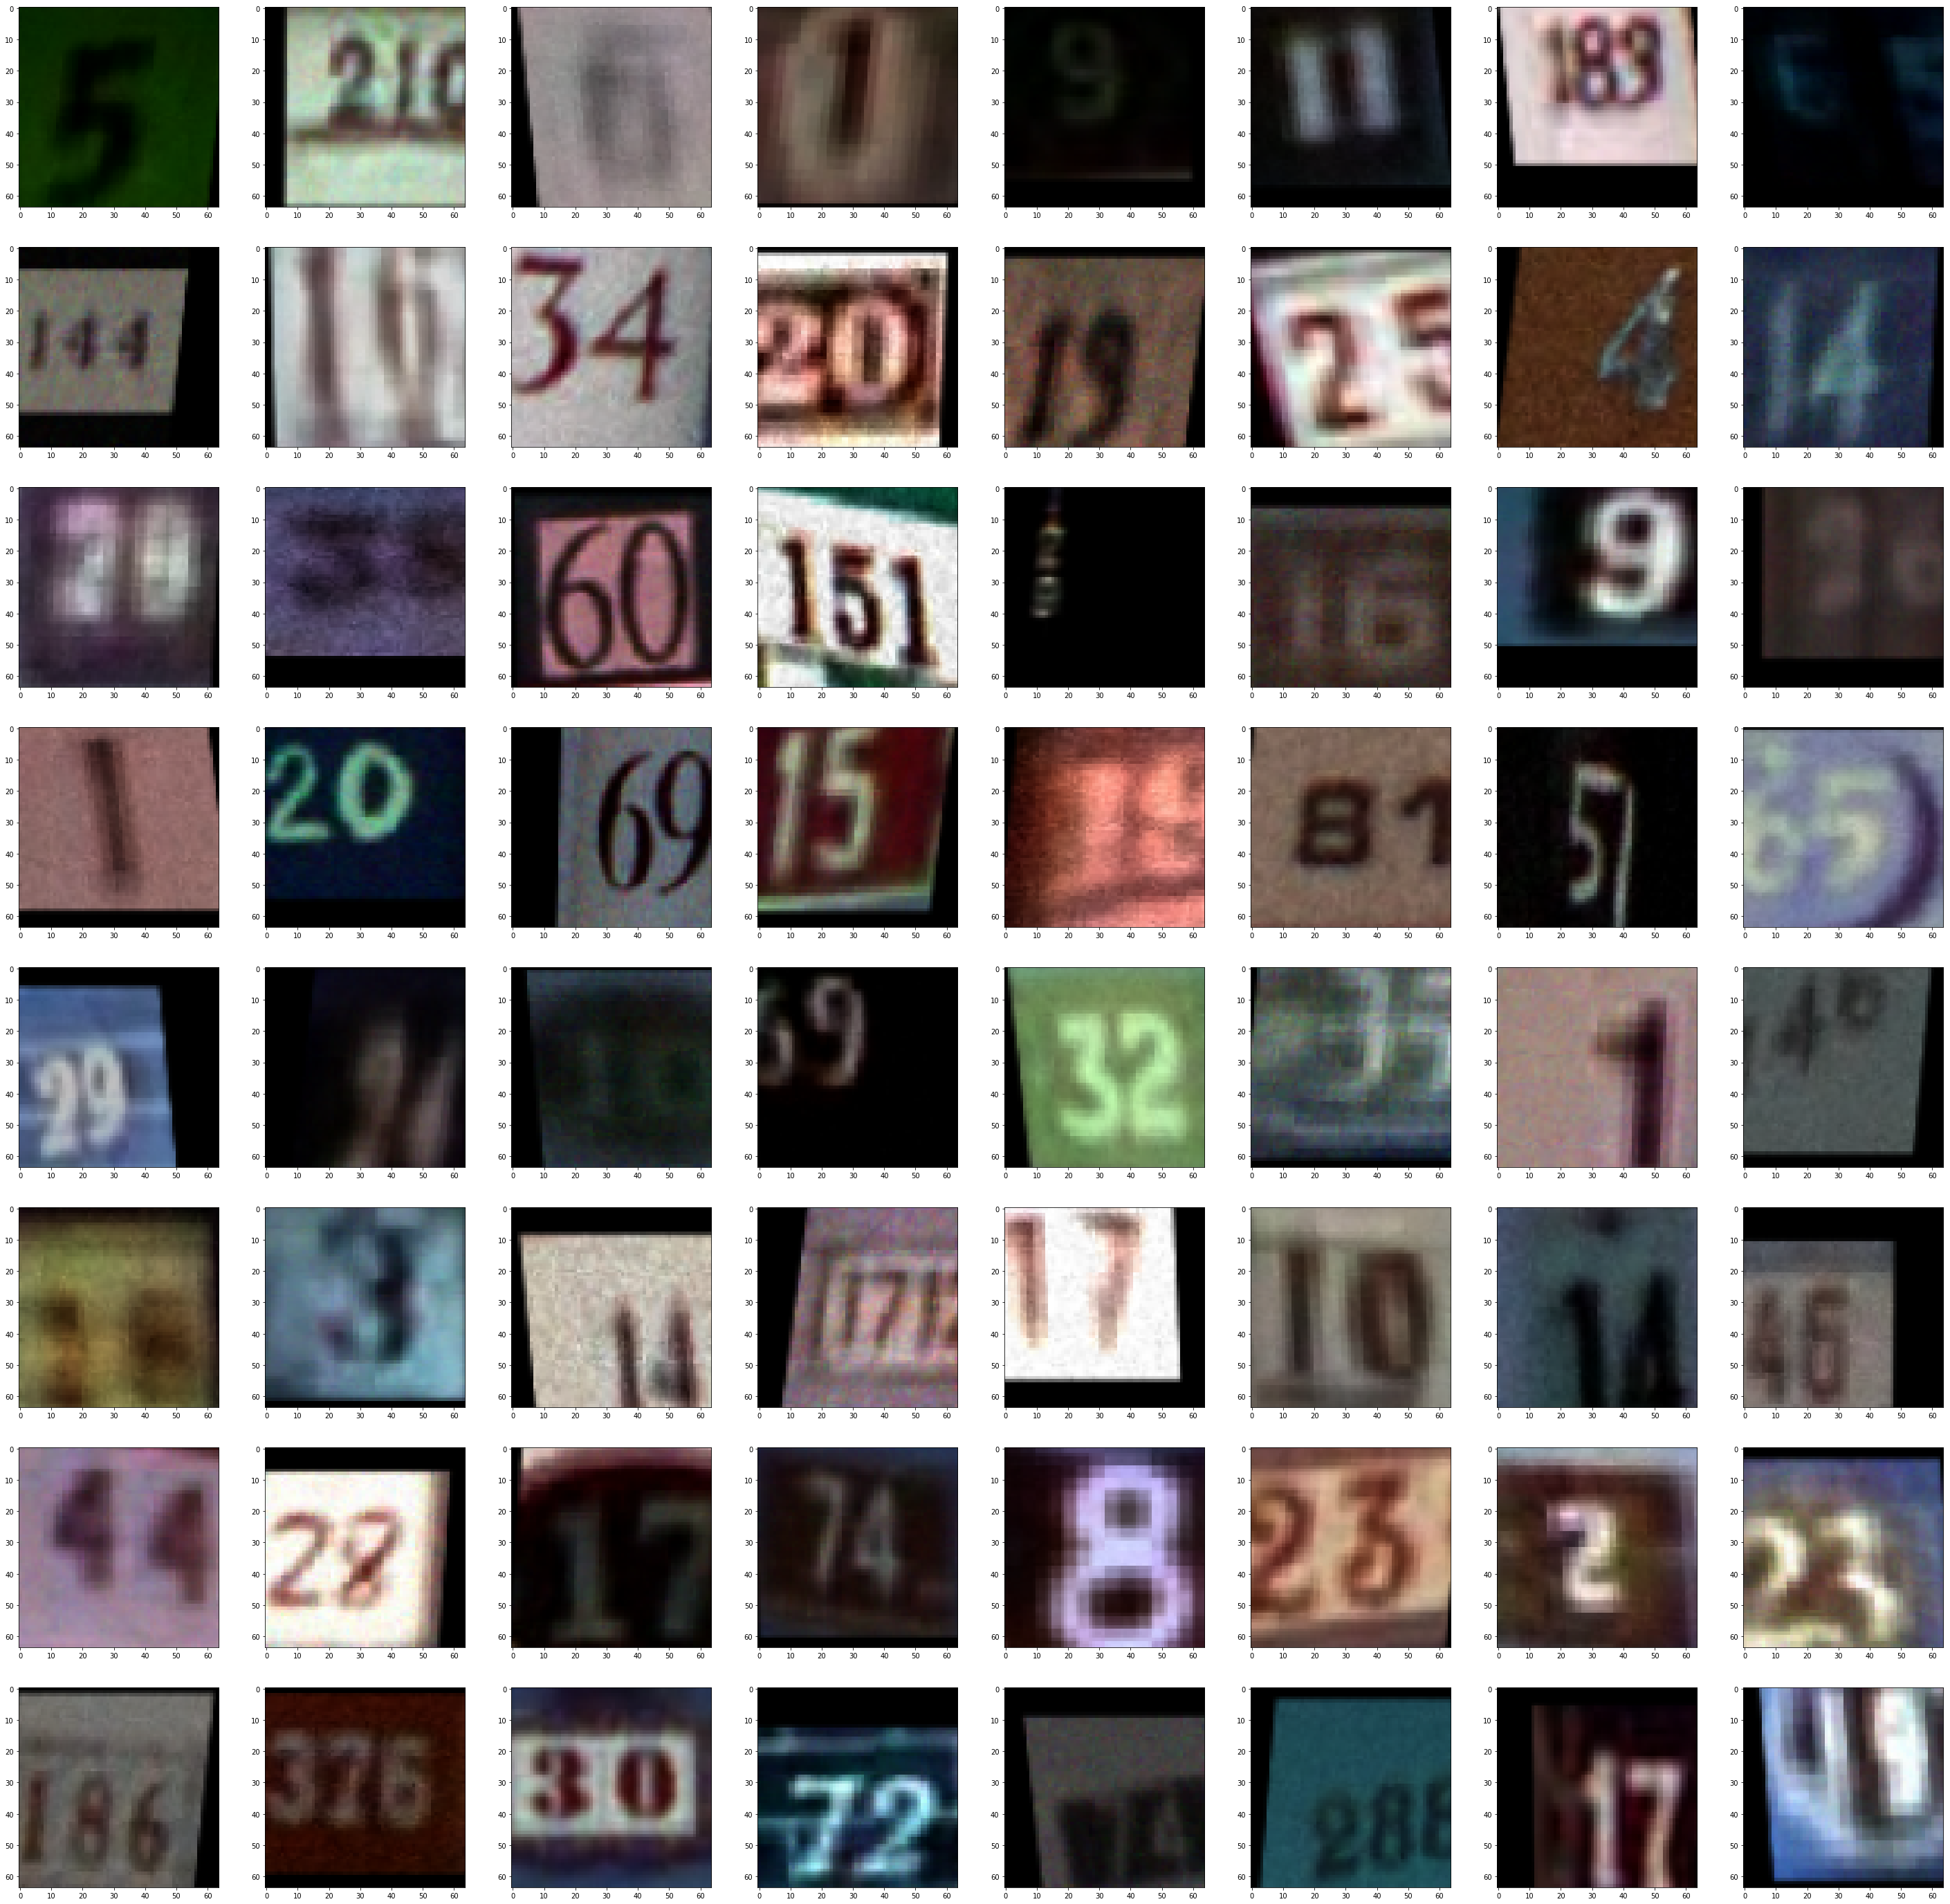

In [28]:
# First 64 data after Data Augmentation
fig = plt.figure(figsize=(50, 50))  # width, height in inches
for i in range(64):
    sub = fig.add_subplot(8, 8, i + 1)
    sub.imshow(image_aug[i,:,:,:], interpolation='nearest')

(10, 64, 64, 3)


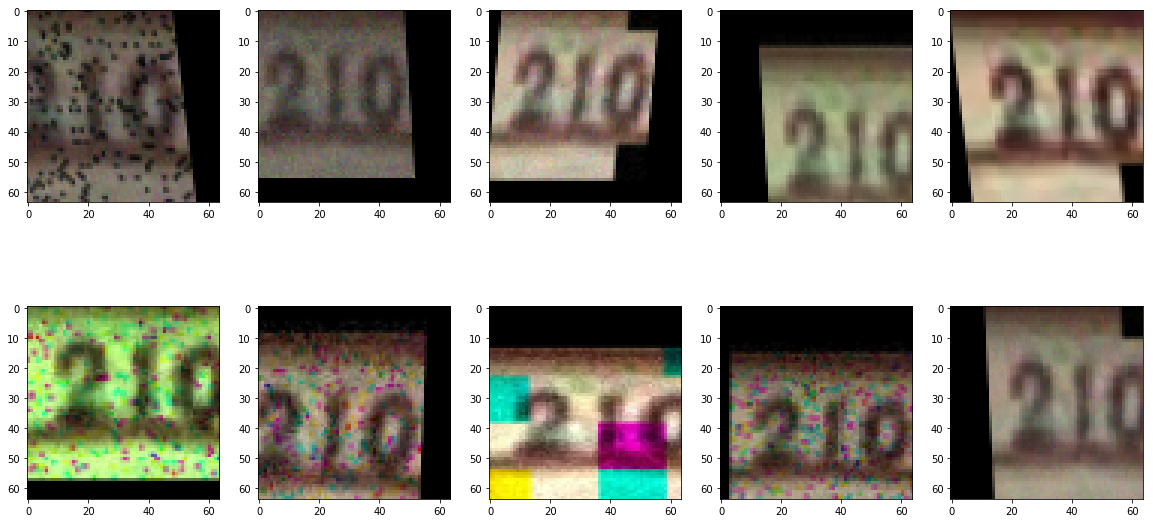

In [25]:
image1 = np.array([test[1] for i in range(10)])
print(image1.shape)
image1_aug = seq(images = image1)
# First 64 data after Data Augmentation
fig = plt.figure(figsize=(20, 10))  # width, height in inches
for i in range(10):
    sub = fig.add_subplot(2, 5, i + 1)
    sub.imshow(image1_aug[i,:,:,:], interpolation='nearest')